# <span style="color:darkblue"> QTM 151 - Assignment 10 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [2]:
# Write your answer here
print ("Abby Brickman 2450991")



Abby Brickman 2450991


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [8]:
# Write your answer here
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, time, datetime

<font size = "5">

In this assigment you will work with data on exchange rates, <br>
for two currencies:

- 1 dollar (USD) to chinese yuan (RMB)
- 1 dollar (USD) to japanese yen (JPY).

For this lecture, you will need the material from <br>
Lecture 20 and 22.


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "exchangerates.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 21.


In [4]:
# Write your own code

exchangerates = pd.read_csv("data_raw/exchangerates.csv")
exchangerates["datetime"] = pd.to_datetime(exchangerates["date_string"]
                                           , format = "%Y, %A, %b %d")



<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "usd_to_rmb" and "usd_to_jpy" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 USD to RMB" and "1 USD to JPY"

Hint: See Lecture 22 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```


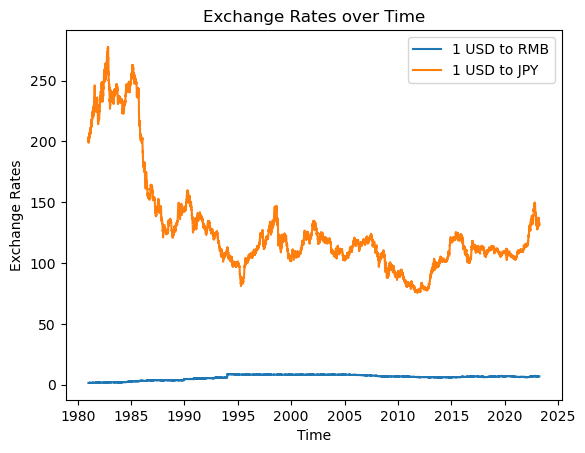

In [6]:
# Write your own code

plt.plot(exchangerates["datetime"], exchangerates["usd_to_rmb"], label='1 USD to RMB')
plt.plot(exchangerates["datetime"], exchangerates["usd_to_jpy"], label='1 USD to JPY')
plt.xlabel('Time')
plt.ylabel('Exchange Rates')
plt.title('Exchange Rates over Time')
plt.legend()

<font size = "5">

(c) Flag subset of data and plot

<font size = "3">

- Create a boolean vector (True/False) "bool_cond" which checks whether <br>
"usd_to_jpy" is below 100
- Generate a line plot with the "usd_to_jpy" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 22 to create a shaded region <br>
for time periods where "bool_cond" is true.



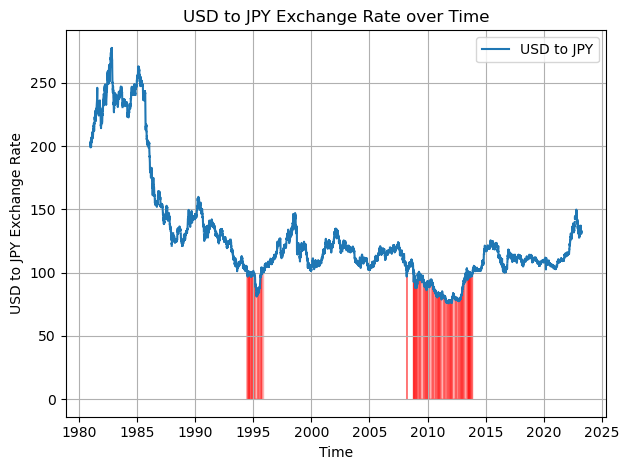

In [11]:
# Write your own code

# Assuming 'exchangerates' is a pandas DataFrame containing 'datetime' and 'usd_to_jpy' columns

# Generate boolean vector
bool_cond = exchangerates["usd_to_jpy"] < 100

# Plotting
plt.plot(exchangerates["datetime"], exchangerates["usd_to_jpy"], label='USD to JPY')

# Fill the region where bool_cond is True
plt.fill_between(exchangerates["datetime"], exchangerates["usd_to_jpy"], where=bool_cond, color='red', alpha=0.3)

# Labeling axes and title
plt.xlabel('Time')
plt.ylabel('USD to JPY Exchange Rate')
plt.title('USD to JPY Exchange Rate over Time')

# Adding legend
plt.legend()

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()



<font size = "5">

(d) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the date column and freq to "m" (month)
- Follow the instructions in Lecture 21 to compute an aggregate dataset <br>
by month which computes the standard deviation of "usd_to_rmb"
- Display the dataset




In [12]:
# Write your own code

# Assuming 'exchangerates' is a pandas DataFrame containing 'datetime' and 'usd_to_rmb' columns

# Creating the month_config object
month_config = pd.Grouper(key='datetime', freq='m')

# Computing aggregate dataset by month
monthly_std_dev = exchangerates.groupby(month_config)['usd_to_rmb'].std()

# Displaying the dataset
print(monthly_std_dev)



datetime
1981-01-31    0.019149
1981-02-28    0.015432
1981-03-31    0.012636
1981-04-30    0.017154
1981-05-31    0.017583
                ...   
2022-11-30    0.077405
2022-12-31    0.028203
2023-01-31    0.052152
2023-02-28    0.067344
2023-03-31    0.034796
Freq: M, Name: usd_to_rmb, Length: 507, dtype: float64


<font size = "5">

(e) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["usd_to_rmb","usd_to_jpy"]
```

- Display the dataset

Hint: See Lecture 22 for details on ```pd.melt()```

In [13]:
# Write your own code

long_format = pd.melt(exchangerates, id_vars='date', value_vars=['usd_to_rmb', 'usd_to_jpy'],
                      var_name='type', value_name='exchange_rate')

# Display the dataset
print(long_format)



KeyError: 'date'